In [ ]:
# Mount data từ Google Drive sang Colab
from google.colab import drive
drive.mount('/content/drive')

# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Đọc dữ liệu

In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/NhapMonKHDL/College.csv' # Đường dẫn tới file cần đọc
df = pd.read_csv(path)  # read_csv từ đường dẫn và trả về dưới dạng một DataFrame
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# 2. Mô tả và làm sạch dữ liệu

## Mô tả dữ liệu

Kiểm tra nhanh dữ liệu

In [ ]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(' TAIL '.center(70,'-'))
    print(dataframe.tail(head))
    print(' MISSING VALUES '.center(70,'-'))
    print(dataframe.isnull().sum())
    print(' DUPLICATED VALUES '.center(70,'-'))
    print(dataframe.duplicated().sum())

check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 777
Columns: 19
------------------------------- TYPES --------------------------------
Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object
-------------------------------- HEAD --------------------------------
                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3         

In [ ]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # Giới hạn (Threshold) cho số giá trị duy nhất (unique value) để được coi là 1 biến categorical (cat) hoặc high-carndinality categorical (car)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical Columns: {len(cat_cols)}')
    print(f'Numerical Columns: {len(num_cols)}')
    print(f'Categorical but cardinal: {len(cat_but_car)}')
    print(f'Numerical but categorical: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=10)
print(cat_cols, num_cols, cat_but_car, sep='\n')

Observations: 777
Variables: 19
Categorical Columns: 1
Numerical Columns: 17
Categorical but cardinal: 1
Numerical but categorical: 0
['Private']
['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
['Unnamed: 0']


In [ ]:
print(f"'Private' Unique Values: {df['Private'].nunique()}")
print(f"'Unnamed: 0' Unique Values: {df['Unnamed: 0'].nunique()}")

'Private' Unique Values: 2
'Unnamed: 0' Unique Values: 777


**Nhận xét nhanh:**
*  Không có biến nào bị khuyết dữ liệu.
*  Biến 'Private' là biến binary và đang có kiểu dữ liệu là string.
*  Biến 'Unnamed: 0' chỉ có tác dụng như index, không mang lại thông tin cho bộ dữ liệu.
*  Khoảng giá trị của các biến khá xa nhau, nếu muốn KMeans chạy tốt ta nên có thêm bước chuẩn hóa dữ liệu.



## Loại bỏ các biến không sử dụng

Loại bỏ biến 'Unnamed: 0' vì không mang lại thông tin cho bộ dữ liệu.

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

## Đổi tên biến

Biến 'Private' là biến binary và có kiểu dữ liệu là string nên ta đổi thành 0, 1 tương ứng với giá trị No, Yes.

In [ ]:
df['Private'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Chuẩn hóa dữ liệu

Chuẩn hóa để đưa khoảng giá trị của các biến lại gần nhau hơn, giúp phân cụm tốt hơn.

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.copy())

In [ ]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,777.000000,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,-1.097363e-16,3.657878e-17,5.486816e-17,-5.486816e-17,-4.115112e-17,-1.554598e-16,1.828939e-17,0.000000,1.554598e-16,3.474984e-16,-1.760354e-16,4.572347e-17,4.572347e-17,-4.115112e-16,-6.401286e-17,9.144694e-18,1.325981e-16,3.612154e-16
std,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00
min,-1.632512e+00,-7.551337e-01,-7.947645e-01,-8.022728e-01,-1.506526e+00,-2.364419e+00,-7.346169e-01,-0.561502,-2.014878e+00,-2.351778e+00,-2.747779e+00,-1.611860e+00,-3.962596e+00,-3.785982e+00,-2.929799e+00,-1.836580e+00,-1.240641e+00,-3.230876e+00
25%,-1.632512e+00,-5.754408e-01,-5.775805e-01,-5.793514e-01,-7.123803e-01,-7.476067e-01,-5.586426e-01,-0.499719,-7.762035e-01,-6.939170e-01,-4.810994e-01,-7.251203e-01,-6.532948e-01,-5.915023e-01,-6.546598e-01,-7.868237e-01,-5.574826e-01,-7.260193e-01
50%,6.125530e-01,-3.732540e-01,-3.710108e-01,-3.725836e-01,-2.585828e-01,-9.077663e-02,-4.111378e-01,-0.330144,-1.120949e-01,-1.437297e-01,-2.992802e-01,-2.078552e-01,1.433889e-01,1.561419e-01,-1.237939e-01,-1.408197e-01,-2.458933e-01,-2.698956e-02
75%,6.125530e-01,1.609122e-01,1.654173e-01,1.314128e-01,4.221134e-01,6.671042e-01,6.294077e-02,0.073418,6.179271e-01,6.318245e-01,3.067838e-01,5.310950e-01,7.562224e-01,8.358184e-01,6.093067e-01,6.666852e-01,2.241735e-01,7.302926e-01
max,6.125530e-01,1.165867e+01,9.924816e+00,6.043678e+00,3.882319e+00,2.233391e+00,5.764674e+00,13.789921,2.800531e+00,3.436593e+00,1.085230e+01,8.068387e+00,1.859323e+00,1.379560e+00,6.499390e+00,3.331452e+00,8.924721e+00,3.060392e+00


# 3. Xây dựng KMeans

Các hàm hỗ trợ để sử dụng trong việc tạo lớp KMeans dễ dàng hơn.

In [ ]:
def init_centroids(X, K):
    rand_idx = np.random.permutation(X.shape[0])
    centroids = X[rand_idx[:K]]
    return centroids

def euclidean_dist(X, centroids):
    return distance.cdist(X, centroids, 'euclidean')

def update_centroids(X, K, labels):
    return np.array([X[labels==i].mean(axis=0) for i in range(K)])

def compute_wcv(X, K, centroids, labels):
    return np.sum([np.sum(np.linalg.norm(X[labels==i] - centroids[i], axis=1)**2) for i in range(K)])

def check_convergence(labels, prev_labels):
    return (labels == prev_labels).all()

Tạo lớp KMeans.

In [ ]:
class KMeans:
    # K: số lượng phân cụm
    # tol: convergence tolerance (giới hạn để dừng khi sự thay đổi giữa 2 iteration bé hơn tol)
    # max_iter: số lượng iterations tối đa
    # cluster_centers_: tọa độ của các tâm cụm
    # labels_: nhãn của từng điểm
    # n_iter_: số lần iterations chạy
    # inertia_: tổng bình phương khoảng cách của các điểm dữ liệu tới tâm cụm gần nhất
    def __init__(self, K=5, tol=1e-4, max_iter=300):
        self.K = K
        self.tol = tol
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_ = None
        self.n_iter_ = None
        self.inertia_ = None

    def fit(self, X):
        centroids = init_centroids(X, K=self.K)
        prev_labels = np.zeros((X.shape[0], self.K))
        prev_wcv = float('inf')
        iter = 0

        while True:
            dist = distance.cdist(X, centroids, 'euclidean')
            labels = np.argmin(dist, axis=1)
            wcv = compute_wcv(X, self.K, centroids, labels)
            centroids_new = update_centroids(X, self.K, labels)
            if (np.sum((centroids_new - centroids) ** 2) <= self.tol) or iter >= self.max_iter:
                break
            centroids = centroids_new
            pre_labels = labels
            iter += 1

        self.cluster_centers_ = centroids
        self.labels_ = labels
        self.n_iter_ = iter
        self.inertia_ = wcv

        return self

    def transform(self, X):
        if self.cluster_centers_ is not None:
            return distance.cdist(X, self.cluster_centers_, 'euclidean')
        else:
            return None

    def predict(self, X):
        if self.cluster_centers_ is not None:
            return np.argmin(distance.cdist(X, self.cluster_centers_, 'euclidean'), axis=1)
        else:
            return None

    def fit_tranform(self, X):
        return self.fit(X).tranform(X)

    def fit_predict(self, X):
        return self.fit(X).labels_

# 4. Kiểm tra và đánh giá

## So sánh kết quả của hàm KMeans tự làm và từ thư viện sklearn

In [ ]:
from sklearn import cluster
coded_kmeans_inertia, sk_kmeans_inertia = 0, 0

for i in range(5):
    coded_kmeans_model = KMeans(K=8)
    coded_kmeans_model.fit(data_scaled)
    coded_kmeans_inertia += coded_kmeans_model.inertia_

for i in range(5):
    sk_kmeans_model = cluster.KMeans(init='random', n_init=1, n_clusters = 8)
    sk_kmeans_model.fit(data_scaled)
    sk_kmeans_inertia += coded_kmeans_model.inertia_

print(f"Coded KMeans mean inertia: {coded_kmeans_inertia/5}")
print(f"Sklearn KMeans mean inertia: {sk_kmeans_inertia/5}")

Coded KMeans mean inertia: 6324.166135384362
Sklearn KMeans mean inertia: 6409.850688852216


**Nhận xét nhanh:**
*   Ta thấy trung bình inertia của 2 mô hình KMeans với số phân cụm là 8 cho kết quả gần nhau. Điều này là 1 dấu hiệu tốt cho thấy mô hình KMeans tự làm của ta có hiệu quả phân cụm khá tương đồng với mô hình của thư viện sklearn.



## Chọn số lượng phân cụm tối ưu

### Mô hình KMeans tự làm

Text(0, 0.5, 'Inertia')

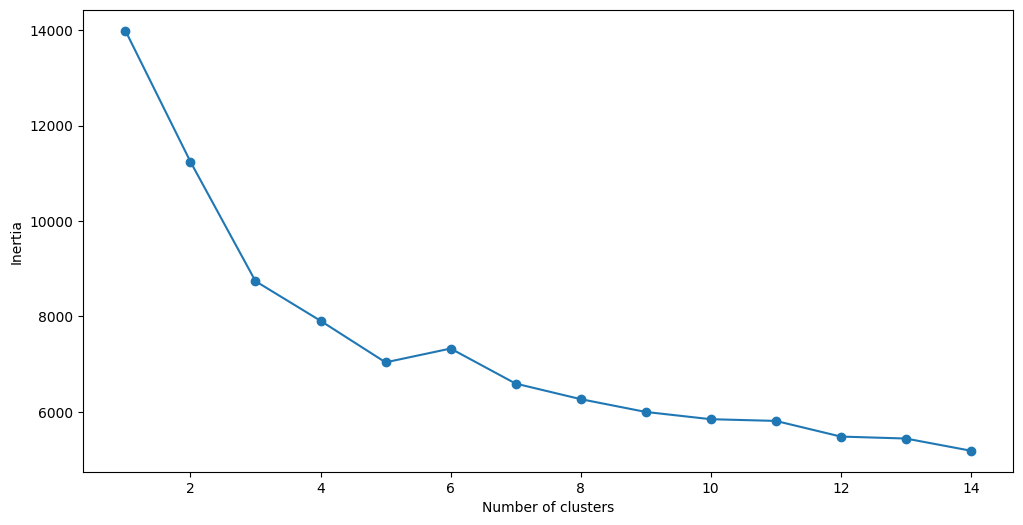

In [ ]:
SSE = [] # SSE chứa các tổng bình phương khoảng cách của các phân cụm với các K khác nhau
for K in range(1,15):
    coded_kmeans_model = KMeans(K=K)
    coded_kmeans_model.fit(data_scaled)
    SSE.append(coded_kmeans_model.inertia_)

# Chuyển kết quả thành dataframe và plot biểu đồ
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Với phương pháp khuỷu tay, ta chọn K=5 và lưu lại mô hình KMeans và nhãn tương ứng mà mô hình dự đoán.

In [ ]:
coded_kmeans_model = KMeans(K=5)
coded_labels = coded_kmeans_model.fit_predict(data_scaled)

### Mô hình KMeans của thư viện sklearn

Text(0, 0.5, 'Inertia')

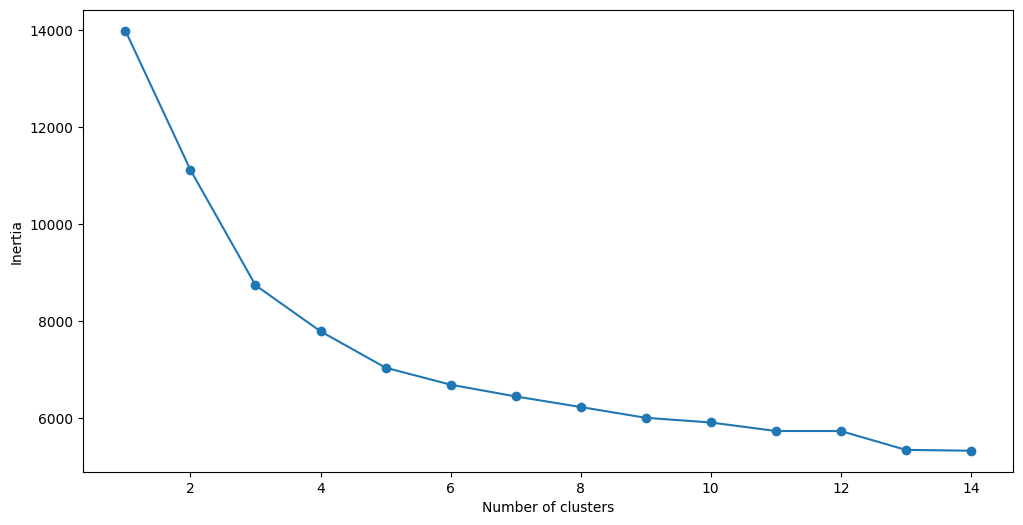

In [ ]:
from sklearn import cluster
SSE = [] # SSE chứa các tổng bình phương khoảng cách của các phân cụm với các K khác nhau
for K in range(1,15):
    sk_kmeans_model = cluster.KMeans(init='random', n_init=1, n_clusters = K)
    sk_kmeans_model.fit(data_scaled)
    SSE.append(sk_kmeans_model.inertia_)

# Chuyển kết quả thành dataframe và plot biểu đồ
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Với phương pháp khuỷu tay và để đồng bộ với mô hình KMeans tự làm ở trên, ta chọn K=5 và lưu lại mô hình KMeans của sklearn và nhãn tương ứng mà mô hình dự đoán.

In [ ]:
sk_kmeans_model = cluster.KMeans(init='random', n_init=1, n_clusters = 5)
sk_labels = sk_kmeans_model.fit_predict(data_scaled)

**Nhận xét nhanh:**
*   Từ 2 biểu đồ đường của mô hình KMeans tự làm và từ thư viện sklearn, ta thấy khoảng giá trị và độ dốc của đường inertia của 2 biểu đồ là gần tương tự nhau khi số lượng phân cụm thay đổi. Điều này cho ta thêm một dẫn chứng tốt về việc mô hình KMeans tự làm của ta có hiệu quả phân cụm tương đồng với mô hình của thư viện sklearn.
*   Ở biểu đồ đường của mô hình KMeans tự làm, khi số phân cụm tăng từ 5 lên 6 thì tổng bình phương các khoảng cách của mô hình lại cao hơn khi số phân cụm là 5. Điều này tuy trái với lý thuyết nhưng dễ hiểu vì mỗi lần khởi tạo các vị trí tâm cụm ban đầu, ta sẽ thu được một kết quả khác nhau. Hoàn toàn có thể xảy ra việc inertia của lần khởi tạo tốt với số phân cụm bằng 5 sẽ thấp hơn inertia của lần khởi tạo với số phân cụm là 6 tệ nhất như trên biểu đồ.


## So sánh kết quả của 2 mô hình KMeans với thuộc tính Private

In [ ]:
X = df.drop(['Private'], axis = 1)
y_true = df['Private']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
coded_model = KMeans(K=2)
coded_priv_labels = coded_model.fit_predict(X_scaled)
sk_model = cluster.KMeans(init='random', n_init=1, n_clusters = 2)
sk_priv_labels = sk_model.fit_predict(X_scaled)

In [ ]:
print(f"Coded KMeans metrics: \tprecision: {precision_score(y_true=y_true, y_pred=coded_priv_labels)}")
print(f"Sklearn KMeans metrics: \tprecision: {precision_score(y_true=y_true, y_pred=sk_priv_labels)}")

Coded KMeans metrics: 	precision: 0.6995884773662552
Sklearn KMeans metrics: 	precision: 0.6995884773662552


**Nhận xét nhanh:**
*   Ta thấy nếu sử dụng KMeans để phân bộ dữ liệu thành 2 cụm thì với cả 2 mô hình (tự làm và từ thư viện sklearn) ta có thể dự đoán chính xác được xấp xỉ 70% các trường đại học tư và công so với biến 'Private'.

# 5. Phân tích sâu hơn

Ta sử dụng PCA để giảm số chiều bộ dữ liệu và trực quan hóa các phân cụm để quan sát phân bố của dữ liệu và độ tách rời của các cụm.

In [ ]:
pca = PCA(random_state=0)
pca.fit(data_scaled)
eigenvals = pca.explained_variance_
eigenvecs = pca.components_

In [ ]:
cumsum = np.cumsum(eigenvals)
cumsum /= cumsum[-1]
cumsum

array([0.30332963, 0.58422333, 0.65031134, 0.70898515, 0.76095207,
       0.80807394, 0.84232387, 0.87497235, 0.90452983, 0.92730054,
       0.94717949, 0.96423591, 0.97454463, 0.98385408, 0.99183819,
       0.99672176, 0.99872342, 1.        ])

In [ ]:
# Giữ lại 2 thành phần chính đầu tiên, ta sẽ lưu trữ được khoảng 58,42% lượng thông tin ban đầu
X_proj_eig = PCA(n_components=2, random_state=0).fit_transform(data_scaled.copy())

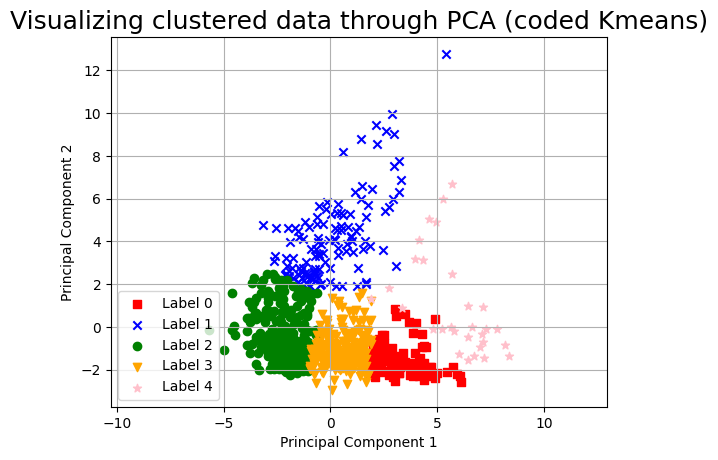

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'pink'] # màu hiển thị, tương ứng red, blue, green, orange, pink
markers = ['s', 'x', 'o', 'v', '*'] # marker cho mỗi label

fig, ax = plt.subplots()

for label, col, marker in zip(np.unique(coded_labels), colors, markers):
    ax.scatter(X_proj_eig[coded_labels == label, 0], X_proj_eig[coded_labels == label, 1], c = col, label = f'Label {label}', marker = marker)

ax.set(xlabel = 'Principal Component 1', ylabel = 'Principal Component 2')
plt.title('Visualizing clustered data through PCA (coded Kmeans)', fontsize=18)
plt.legend(loc='lower left')
plt.gca().set_aspect('equal', 'datalim')
plt.grid()
plt.show()

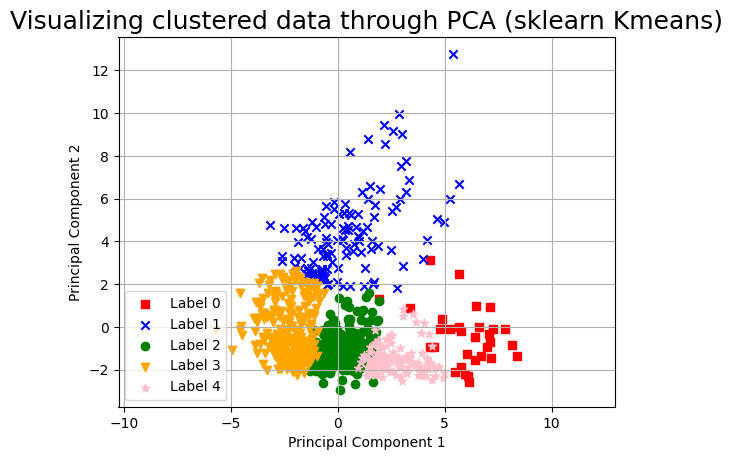

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'pink'] # màu hiển thị, tương ứng red, blue, green, orange, pink
markers = ['s', 'x', 'o', 'v', '*'] # marker cho mỗi label

fig, ax = plt.subplots()

for label, col, marker in zip(np.unique(sk_labels), colors, markers):
    ax.scatter(X_proj_eig[sk_labels == label, 0], X_proj_eig[sk_labels == label, 1], c = col, label = f'Label {label}', marker = marker)

ax.set(xlabel = 'Principal Component 1', ylabel = 'Principal Component 2')
plt.title('Visualizing clustered data through PCA (sklearn Kmeans)', fontsize=18)
plt.legend(loc='lower left')
plt.gca().set_aspect('equal', 'datalim')
plt.grid()
plt.show()

**Nhận xét:**
*   Nhìn chung cả 2 mô hình KMeans đều chia bộ dữ liệu thành 5 cụm khá giống nhau. Tuy nhiên, không phải lúc nào 2 mô hình cũng sẽ cho ra cùng 5 cụm giống nhau như trên, điều này là do sự khác nhau của các lần chạy khi ta khởi tạo các vị trí ban đầu của các tâm cụm. Nếu trực quan hóa kết quả của 2 mô hình không giống nhau chưa chắc thuật toán của ta không tốt và nên thử chạy lại nhiều lần để kiểm tra.
*   Các cụm không bị đè chồng, xâm lấn nhiều lên nhau, có thể tách biệt rõ ràng khi nhìn bằng mắt thường. Điều này gợi ý rằng việc phân cụm của ta đã chạy đúng.
*   Tuy nhiên, với mỗi cụm ta thấy có vẻ mật độ các điểm dữ liệu và khoảng cách giữa các điểm dữ liệu với nhau là khác nhau. Điều này là không tránh khỏi vì bộ dữ liệu của ta càng về phía dưới bên trái thì mật độ càng dày đặc, khoảng cách cách giữa các điểm dữ liệu càng nhỏ lại dẫn tới các cụm ở khu vực này sẽ có mật độ lớn hơn những cụm ở khu vực phía bên phải.